## Тестовое задание № 1

In [1]:
# Импортируем все необходимые для работы модули:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Загрузим данные в датафрейм:

data = pd.read_csv("C:\\Users\\Ismail\\Desktop\\Тестовое задание\\файл 1.txt", sep="\t")
data

,login,tid,Microtasks,assigned_ts,closed_ts
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01
1,login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10
3,login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50
...,...,...,...,...,...
701822,login766,195656026.0,1.0,2017-05-15 15:53:27,2017-05-15 16:16:56
701823,login766,195656174.0,1.0,2017-05-15 15:53:33,2017-05-15 16:21:53
701824,login766,195656466.0,1.0,2017-05-15 15:53:38,2017-05-15 16:23:41
701825,login766,195656336.0,3.0,2017-05-15 15:54:18,2017-05-15 16:32:11


In [3]:
# Добавим в датафрейм новую колонку, содержащую общее время в секундах, затраченное на одно задание:

data["work_time_in_seconds"] = data.apply(
    lambda row: (datetime.strptime(row["closed_ts"], '%Y-%m-%d %H:%M:%S') - datetime.strptime(row["assigned_ts"],
                                                                                              '%Y-%m-%d %H:%M:%S')).seconds,
    axis=1)

In [4]:
data

,login,tid,Microtasks,assigned_ts,closed_ts,work_time_in_seconds
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01,3802
1,login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29,1079
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10,4119
3,login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56,2726
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50,2768
...,...,...,...,...,...,...
701822,login766,195656026.0,1.0,2017-05-15 15:53:27,2017-05-15 16:16:56,1409
701823,login766,195656174.0,1.0,2017-05-15 15:53:33,2017-05-15 16:21:53,1700
701824,login766,195656466.0,1.0,2017-05-15 15:53:38,2017-05-15 16:23:41,1803
701825,login766,195656336.0,3.0,2017-05-15 15:54:18,2017-05-15 16:32:11,2273


In [5]:
# Добавим в датафрейм новую колонку, содержащую время в секундах, в среднем затраченное на одно микрозадание в рамках одного задания.
# Это поможет избежать путаницы, связанной с пересечением интервалов времени работы над заданиями. 

data["seconds_per_microtask"] = data.apply(lambda row: row["work_time_in_seconds"] / row["Microtasks"], axis=1)

In [6]:
data

,login,tid,Microtasks,assigned_ts,closed_ts,work_time_in_seconds,seconds_per_microtask
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01,3802,950.500000
1,login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29,1079,1079.000000
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10,4119,1029.750000
3,login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56,2726,2726.000000
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50,2768,1384.000000
...,...,...,...,...,...,...,...
701822,login766,195656026.0,1.0,2017-05-15 15:53:27,2017-05-15 16:16:56,1409,1409.000000
701823,login766,195656174.0,1.0,2017-05-15 15:53:33,2017-05-15 16:21:53,1700,1700.000000
701824,login766,195656466.0,1.0,2017-05-15 15:53:38,2017-05-15 16:23:41,1803,1803.000000
701825,login766,195656336.0,3.0,2017-05-15 15:54:18,2017-05-15 16:32:11,2273,757.666667


Text(0, 0.5, 'Частота')

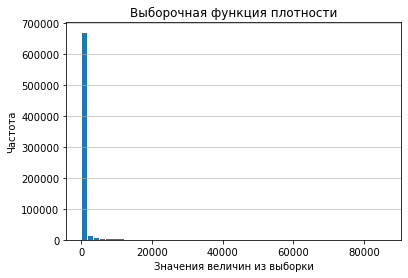

In [8]:
# Построим гистограмму для распределения времени, потраченного на одно микрозадание у всех асессоров:

first_edge, last_edge = data["seconds_per_microtask"].min(), data["seconds_per_microtask"].max()
n_equal_bins = 50
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
plt.hist(data["seconds_per_microtask"], bins=bin_edges, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.title("Выборочная функция плотности")
plt.xlabel('Значения величин из выборки')
plt.ylabel('Частота')

In [9]:
# Как видно из вышепредставленного графика выборочной плотности, распределение времени, затраченного на одно микрозадание, никак не близко к нормальному.
# Следовательно, усреднять время на одно микрозадание было бы большой ошибкой, так как в выборке присутствуют выбросы (распределение не является нормальным).
# В этой связи наиболее оптимальным вариантом является медианное значение времени, затраченного на одно микрозадание.

In [25]:
# Можно наглядно показать, что выбор между средним и медианным значением, является важным этапом решения задачи:

print(f"""медианное значение = {data["seconds_per_microtask"].median()}""")
print(f"""среднеарифметическое значение = {data["seconds_per_microtask"].mean()}""")

медианное значение = 75.0
среднеарифметическое значение = 509.80909825258317


In [24]:
print(f"""Справедливая заработная плата = {data["seconds_per_microtask"].median() / 30} * N""")

Справедливая заработная плата = 2.5 * N


## Тестовое задание № 2

In [28]:
# Загрузим данные в датафрейм:

df = pd.read_csv("C:\\Users\\Ismail\\Desktop\\Тестовое задание\\файл 2.csv", sep="\t")
df

,login,uid,docid,jud,cjud
0,assessor158,158,0,0,0
1,assessor238,238,0,0,0
2,assessor488,488,0,0,0
3,assessor136,136,0,0,0
4,assessor300,300,0,0,0
...,...,...,...,...,...
249995,assessor208,208,49999,1,1
249996,assessor139,139,49999,1,1
249997,assessor333,333,49999,1,1
249998,assessor160,160,49999,1,1


In [39]:
# Для начала проверим соотношение классов документов в выборке:

df.drop_duplicates(subset="docid")["cjud"].value_counts()

0    44004
1     5996
Name: cjud, dtype: int64

In [40]:
# Как видно, выборка несбалансирована, поэтому такие метрики как доля правильных или неправильных ответов не подойдут, так как они не будут отражать "цену ошибки" для каждого класса в отдельности.
# Cкажем, какая-нибудь константная модель принятия решений, которая выдает все время "0", имела бы очень высокое значение "accuracy", хотя сама модель в какой-то степени бесмысленна.

In [48]:
# Сгруппируем данные таким образом, чтобы каждому асессору соответствовал массив с его ответами и массив с истинными ответами:

grouped_df = df.groupby(["uid"])
grouped_lists_jud = grouped_df["jud"].apply(list)
grouped_lists_cjud = grouped_df["cjud"].apply(list)
grouped_dataframe = pd.DataFrame({"jud": grouped_lists_jud, "cjud": grouped_lists_cjud})

In [52]:
grouped_dataframe

,jud,cjud
uid,,
0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
1,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
595,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
596,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
597,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [60]:
from sklearn.metrics import f1_score
# Чтобы учесть особенности баланса классов в выборке можно использовать метрики "precision" и "recall".
# Данные метрики качества считаются через TP, TN, FP, FN (так называемая "confusion matrix").
# "precision" отвечает за точность прогнозов модели, а "recall" отвечает за объем (полноту) правильно отгаданных ответов.
# F-мера позволяет подобрать наиболее оптимальный баланс между точностью и полнотой ответов: отклонение какого-либо показателя в любую сторону резко уменьшает значение F-меры, что не есть хорошо.
# В любом случае F-меру можно сбалансировать на любой вкус, отдав больше предпочтения точности или полноте ответов модели.

# Поэтому посчитаем значение F-меры для каждого асессора:
grouped_dataframe["f1_score"] = grouped_dataframe.apply(lambda row: f1_score(row["cjud"], row["jud"]), axis=1)

In [61]:
grouped_dataframe

,jud,cjud,f1_score
uid,,,
0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ...",0.601227
1,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.500000
2,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.536585
3,"[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.178571
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.595506
...,...,...,...
595,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.524823
596,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.740157
597,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.651515


In [70]:
# Ниже приведены результаты отбора асессоров по значению F-меры:

print(f"""the best user id: {np.argmax(grouped_dataframe["f1_score"])}""")
print(f"""the best f1_score: {grouped_dataframe["f1_score"].max()}""")
print(f"""the worst user id: {np.argmin(grouped_dataframe["f1_score"])}""")
print(f"""the worst f1_score: {grouped_dataframe["f1_score"].min()}""")

the best user id: 82
the best f1_score: 0.75177304964539
the worst user id: 163
the worst f1_score: 0.1038961038961039
